
# Examen rápido No. 4

## Reconocimiento de Patrones, 2023-2

## Licenciatura en Ciencia de la Computación

**Miguel Navarro**

Partiendo de: <br>
$$
Y^{(i)}| X^{(i)};w,b\sim Poisson (\lambda)
$$ <br>
**1. Encontrar $b(y), \eta, T(y), a(\eta)$**   
Tenemos:
$$ Pr(y|\lambda) = \dfrac{\lambda^{y_i}e^{-\lambda}}{y_i!}$$  
Y la representación de una familia exponencial:
$$ p(y |\eta ) = b(y) exp \{ \eta^T T(y) - a (\eta)\}$$
Por lo tanto:  
$$P(y|\eta)=exp\{\log(\dfrac{\lambda^{y_i}e^{-\lambda}}{y_i!})\}$$
$$ = \dfrac {1}{y!} exp \{y\log\lambda - \lambda \} $$
De forma que:
$$b(y) = \dfrac{1}{y!}$$
$$\eta = \log \lambda$$
$$T(y) = y$$
$$a(\eta) = e^\eta$$

**2. Encontrar la funcion de link inversa**  
Tenemos $\eta = log \lambda$ entonces:
$$ \lambda = e ^ \eta$$

**3. Encontrar como calcular $\hat{y}=E[Y^{i}|X^{i}; w, b]$** en función de $X^{(i)}, w, b$  
Reemplazamos los valores de $\eta$ en la probabilidad calculada anteriormente:
$$P(y_i|x_i, w, b)=\dfrac{1}{y!}\cdot exp\{y^{(i)}(wx+b)-e^{wx+b}\}$$
De forma que: 
$$\hat{y} = $$
$$\hat{y} = e^{wx+b}$$ 

**4. Usando el criterio de máxima verosimilitud, encontrar la función de costo (pérdida)**  
Partiendo de:  
$$w*, b* = \arg \max_{w\in R^n, b\in R} \prod ^{m}_{i=1} h(y^{i})e^{\eta(\lambda^{(i)})T(y^{(i)})-A(\lambda^{(i)})}$$
$$w*, b* = \arg \max_{w\in R^n, b\in R} \prod ^{m}_{i=1} \dfrac{1}{y^{(i)}!}e^{\log(\lambda^{(i)})y^{(i)}-\lambda^{(i)}}$$
Aplicamos el criterio de máxima verosimilitud:  
$$w*, b* = \arg \max_{w\in R^n, b\in R} \sum^{m}_{i=1}\log( \dfrac{1}{y^{(i)}!})+\log(e^{\log(\lambda^{(i)})y^{(i)}-\lambda^{(i)})})$$
$$w*, b* = \arg \max_{w\in R^n, b\in R} \sum^{m}_{i=1}\log(e^{\log(\lambda^{(i)})y^{(i)}-\lambda^{(i)})})$$
$$w*, b* = \arg \max_{w\in R^n, b\in R} \sum^{m}_{i=1}\log(\lambda^{(i)})y^{(i)}-\lambda^{(i)}$$
Como queremos minimizar y promediar:
$$w*, b* = \arg \min_{w\in R^n, b\in R} \dfrac{1}{M} \sum^{m}_{i=1}\log(\lambda^{(i)})y^{(i)}-\lambda^{(i)}$$
$$w*, b* = \arg \min_{w\in R^n, b\in R} \dfrac{1}{M} \sum^{m}_{i=1}\hat{y^{(i)}}-\log(y^{(i)})y^{(i)}$$
Obteniendo la función de pérdida:  
$$E_{in}(w,b)= \dfrac{1}{M} \sum^{m}_{i=1}\hat{y^{(i)}}-\log(y^{(i)})y^{(i)}$$

**5. Derivar la regla de aprendizaje:**  
$$\dfrac{\partial E_{in}(w,b)}{\partial w } = \dfrac{\partial}{\partial w } \dfrac{1}{m}\sum^m_{i=1} e^{w^Tx^{(i)}+b}-(w^{T}x^{(i)}+b)y^{(i)}$$
$$\dfrac{\partial E_{in}(w,b)}{\partial w } = \dfrac{1}{m} \sum^m_{i=1} x_i (\hat{y} - y^{(i)})$$  
$$\dfrac{\partial E_{in}(w,b)}{\partial b } = \dfrac{1}{m} \sum^n_{i=1} \hat{y} - y^{(i)}$$

**6. Encontrar la forma algoritmica para calcular $\Delta w$, $\Delta b$**  
Hacemos un descenso simple:


In [ ]:
for i in range(epochs):
    # Calculate dw
    # Calculate db
    w = w - alpha * w
    b = b - alpha * b

**7. Programar el algoritmo y hacer un caso ilustrativo**

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

Definimos la función para calcular la pérdida:

In [38]:
def loss(x, a, w, b):
  a_hat = np.exp(x @ w + b)
  error = (a_hat - np.log(a_hat) * a).mean()
  return error

Definimos la función para calcular los gradientes:

In [25]:
def gradiente(x, a, w, b):
    
    M = x.shape[0]
    hat_a = np.exp(x@w+b)
    diff = hat_a-a
    dw = (x.T @ diff)/M
    db = diff.mean()
    
    return dw, db



Definimos el descenso:

In [26]:
def descenso(x, a, nu, max_iter=int(1e4), historial=False):
    M, n = x.shape
    
    w = np.zeros(n)
    b = 0.0

    if historial:
        error_hist = np.zeros(max_iter)
        error_hist[0] = loss(x,a,w,b)
    else:
        error_hist = None
        
    for epoch in range(1, max_iter):
        dw, db = gradiente(x,a,w,b)
        
        w = w-nu*dw
        b = b-nu*db
    
        if historial:
            error_hist[epoch] = loss(x,a,w,b)
    return w, b, error_hist

Generamos un conjunto de datos aleatorios de una distribución de Poisson:
$$ w = [0.33, 0.12, 0.21]$$
$$ b = 7 $$


In [27]:
M = 100,000
x = np.hstack
M = 10_000
x = np.hstack([
    np.random.normal(0.0, 1.0, M).reshape(M, 1),
    np.random.normal(0.0, 1.0, M).reshape(M, 1),
    np.random.normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(x, np.array([0.33, 0.12, 0.21])) + 7.0 + np.random.normal(0.0, 0.01, M)
a = np.exp(z)

Ahora si probamos nuestro descenso:

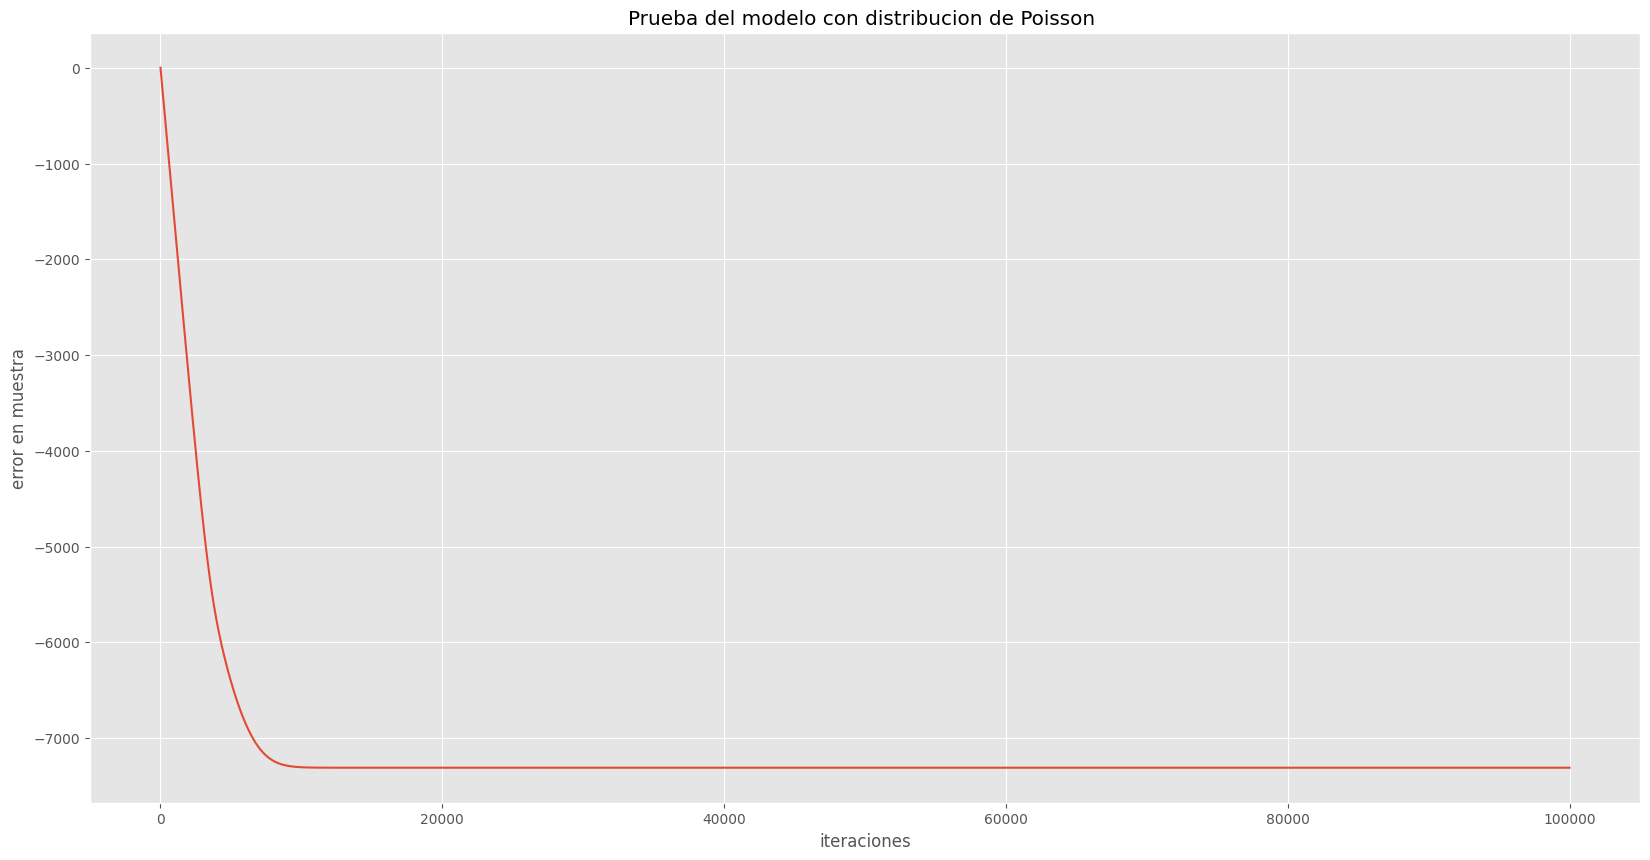

In [42]:
w, b, hist = descenso(x, a, nu = 1e-6, max_iter=100000, historial=True)
plt.plot(np.arange(0, 100000, 1, dtype=int), hist)
plt.title(r'Prueba del modelo con distribucion de Poisson ' )
plt.xlabel('iteraciones')
plt.ylabel('error en muestra')
plt.show()

In [43]:
print(f"Los valores aproximados para w son: {w}")
print(f"El valor aproximado para b es: {b}")

Los valores aproximados para w son: [0.33021693 0.12003224 0.20997815]
El valor aproximado para b es: 6.999952596642168


Como podemos ver, el algoritmo aproximó correctamente la función con la que se generaron los datos por lo que el código si funciona :)